In [1]:
# import and preprocess data
%matplotlib inline
from pu_preprocessing import *
rcParams['figure.figsize'] = 20, 8

d2014_states
d2015_states

,COMPOUND,YEAR,STATE_CODE,COUNTY_CODE,LOW_ESTIMATE,HIGH_ESTIMATE,COUNTY,STATE
0,1-Methyl Cyclopropene,2015,41,1,0.0,0.0,Baker County,OR
1,1-Methyl Cyclopropene,2015,41,21,0.0,0.1,Gilliam County,OR
2,1-Methyl Cyclopropene,2015,41,27,0.0,1.7,Hood River County,OR
3,1-Methyl Cyclopropene,2015,41,49,0.0,0.1,Morrow County,OR
4,1-Methyl Cyclopropene,2015,41,55,0.0,0.0,Sherman County,OR
5,1-Methyl Cyclopropene,2015,41,59,0.0,5.7,Umatilla County,OR
6,1-Methyl Cyclopropene,2015,41,61,0.0,0.0,Union County,OR
7,1-Methyl Cyclopropene,2015,41,63,0.0,0.0,Wallowa County,OR
8,1-Methyl Cyclopropene,2015,41,65,0.0,0.1,Wasco County,OR
9,1-Methyl Cyclopropene,2015,53,1,0.0,10.6,Adams County,WA


In [2]:
d2014_mx = d2014_states.as_matrix()
x = d2014_mx[:, 2]   # State_Code
yl = d2014_mx[:, 4]  # LOW_ESTIMATE
yh = d2014_mx[:, 5]  # HIGH_ESTIMATE
yl.min(), yl.max(), yh.min(), yh.max()

(0.0, 5507145.8, 0.0, 5507145.8)

### VISUAL

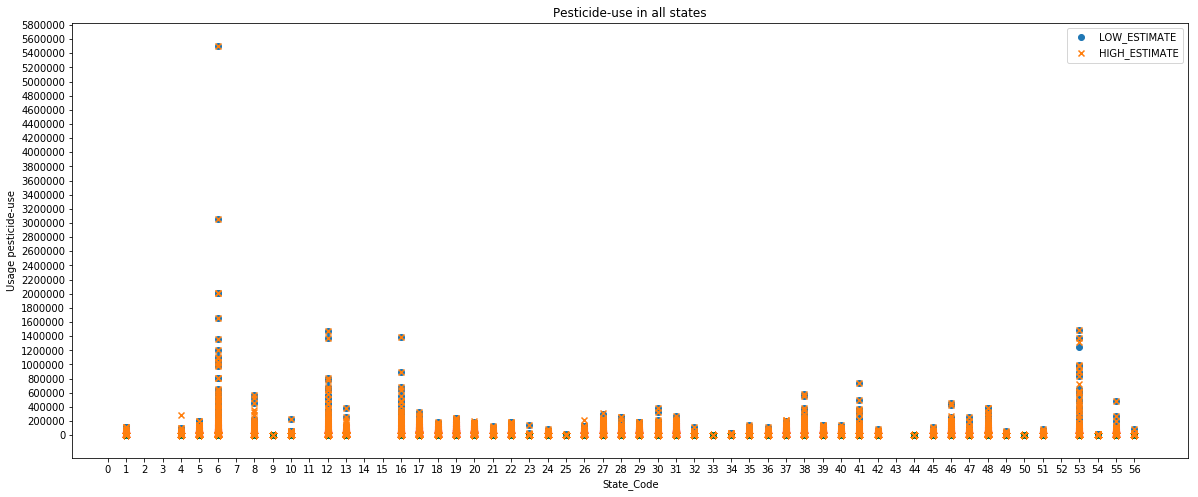

In [3]:
d2014_mx = d2014_states.as_matrix()
x = d2014_mx[:, 2]   # State_Code

yl = d2014_mx[:, 4]  # LOW_ESTIMATE
plt.scatter(x, yl, label="LOW_ESTIMATE")

yh = d2014_mx[:, 5]  # HIGH_ESTIMATE
plt.scatter(x, yh, marker='x', label="HIGH_ESTIMATE")

plt.xticks(range(x.max()+1))
plt.yticks(range(0, 6000000, 200000))
plt.xlabel("State_Code")
plt.ylabel("Usage pesticide-use")
plt.title("Pesticide-use in all states")
plt.legend()

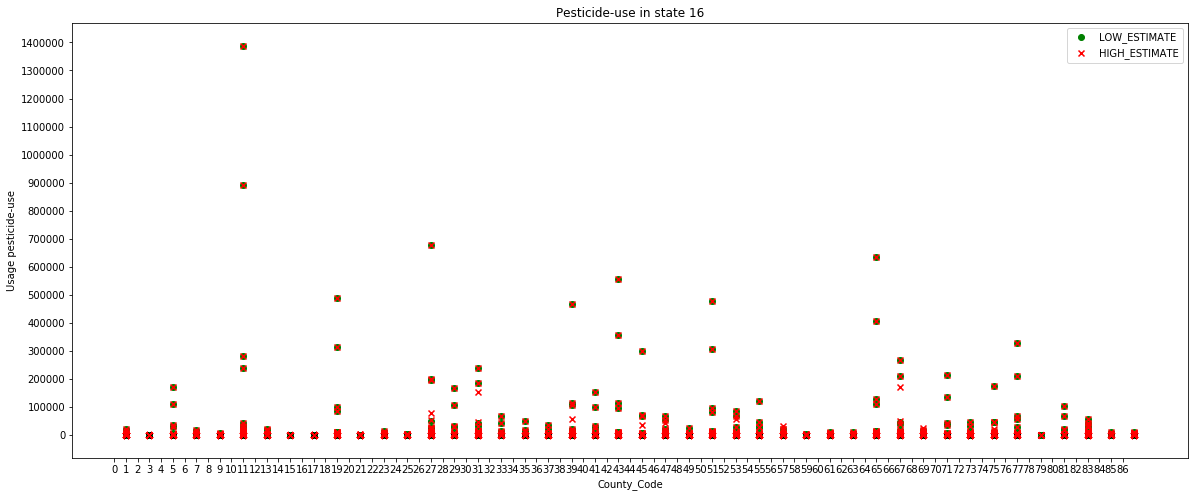

In [4]:
# Visualize the Pesticide-use at the certain state 
state_code = 16
state = d2014_states.loc[d2014_states['STATE_CODE'] == state_code]

county_code = state['COUNTY_CODE'].drop_duplicates()

state_mx = state.as_matrix()
x = state_mx[:, 3]  # County_Code

yl = state_mx[:, 4]  # LOW_ESTIMATE
yh = state_mx[:, 5]  # HIGH_ESTIMATE

plt.scatter(x, yl, label="LOW_ESTIMATE", color='green')
plt.scatter(x, yh, marker='x', label="HIGH_ESTIMATE", color='red')

plt.xticks(range(county_code.max()))
plt.yticks(range(0, 1500000, 100000))

plt.xlabel("County_Code")
plt.ylabel("Usage pesticide-use")
plt.title("Pesticide-use in state %i" %state_code)
plt.legend()


In [5]:
# Frequency pesticide-use of compound at every State
x = d2014_states[['COMPOUND']].groupby(d2014_states['STATE_CODE']).describe()

# slicing columns multi_index
y = x.loc[:, (slice('COMPOUND'), ['top', 'freq'])]
y

COMPOUND     
                           top freq
STATE_CODE                         
1                Sulfosulfuron   67
4                   Permethrin   15
5                 Aminopyralid   74
6                   Glyphosate   57
8                     Picloram   63
9                   Sethoxydim    8
10                  Sethoxydim    3
12               Sulfosulfuron   67
13                Nicosulfuron  159
16               Pendimethalin   44
17                  Bromoxynil  102
18                  Bromoxynil   92
19                  Bromoxynil   99
20             Prothioconazole  105
21                 Metsulfuron  120
22                    Picloram   64
23                  Sethoxydim   16
24          Alpha Cypermethrin   23
25                  Glyphosate   14
26                  Glyphosate   83
27                       2,4-D   87
28             Trifloxystrobin   82
29                    Paraquat  114
30                    Imazamox   56
31                    Imazamox   93
32                  Glyphosate   17
33                  Sethoxydim   10
34            Copper Hydroxide   20
35                  Cyfluthrin   33
36                Chlorpyrifos   59
37                Nicosulfuron  100
38             Trifloxystrobin   53
39                  Bromoxynil   88
40               Esfenvalerate   77
41            Copper Hydroxide   36
42          Copper Oxychloride   67
44               Diflufenzopyr    5
45            Copper Hydroxide   46
46               Diflufenzopyr   66
47          Cyhalothrin-Lambda   95
48                    Picloram  254
49                    Imazapic   29
50                  Sethoxydim   14
51              Chlorothalonil   97
53                      Copper   39
54                Aminopyralid   55
55                  Glyphosate   72
56                   Clethodim   23

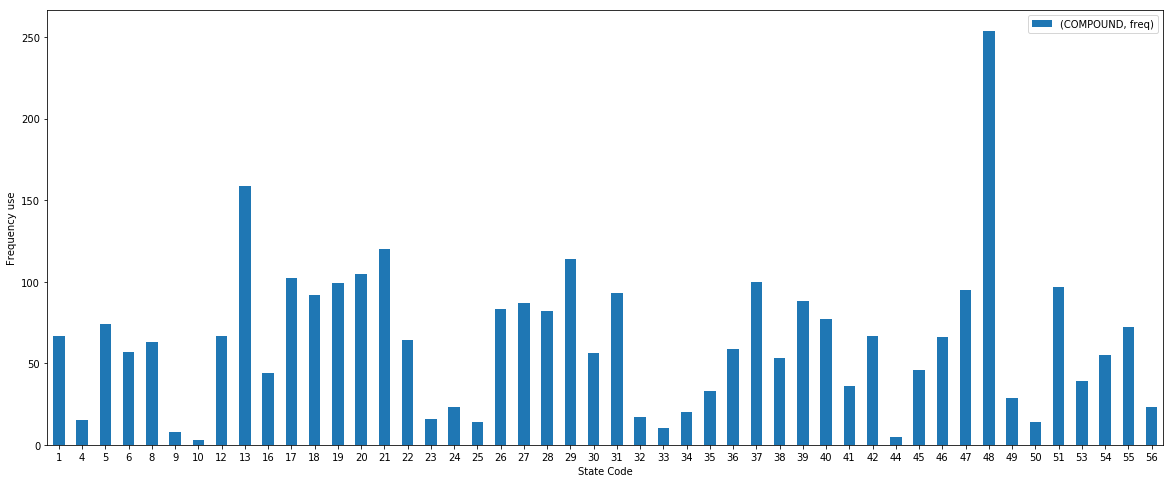

In [6]:
y_freq = x.loc[:, (slice('COMPOUND'), ['freq'])]
y_freq.plot(kind='bar')
plt.xlabel("State Code")
plt.ylabel("Frequency use")
plt.xticks(rotation=0)
plt.legend()

In [7]:
max_year_high_est, max_year_low_est, min_year_high_est, min_year_low_est = get_max_min(d2014_states) 
print("MAX")
print(max_year_high_est)
print(max_year_low_est)
print("\n")
print("MIN")
print(min_year_high_est)
print(min_year_low_est)

MAX
YEAR                2014.0
HIGH_ESTIMATE    5507145.8
dtype: float64
YEAR               2014.0
LOW_ESTIMATE    5507145.8
dtype: float64


MIN
YEAR             2014.0
HIGH_ESTIMATE       0.0
dtype: float64
YEAR            2014.0
LOW_ESTIMATE       0.0
dtype: float64


In [8]:
max_year_high_est, max_year_low_est, min_year_high_est, min_year_low_est = get_max_min(d2015_states) 
print("MAX")
print(max_year_high_est)
print(max_year_low_est)
print("\n")
print("MIN")
print(min_year_high_est)
print(min_year_low_est)

MAX
YEAR                2015.0
HIGH_ESTIMATE    2283969.1
dtype: float64
YEAR               2015.0
LOW_ESTIMATE    2283969.1
dtype: float64


MIN
YEAR             2015.0
HIGH_ESTIMATE       0.0
dtype: float64
YEAR            2015.0
LOW_ESTIMATE       0.0
dtype: float64


Text(0.5,1,'Year 2015')

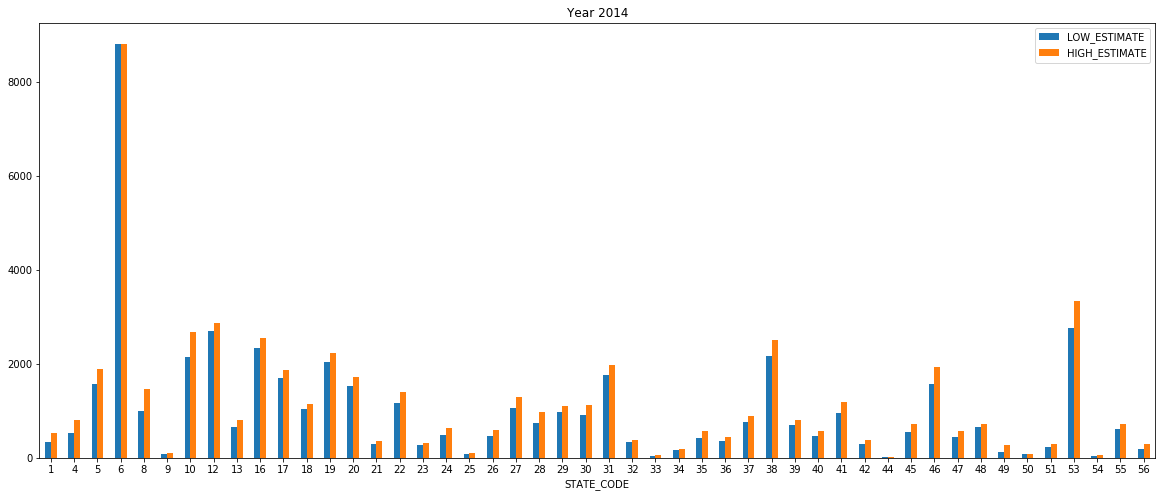

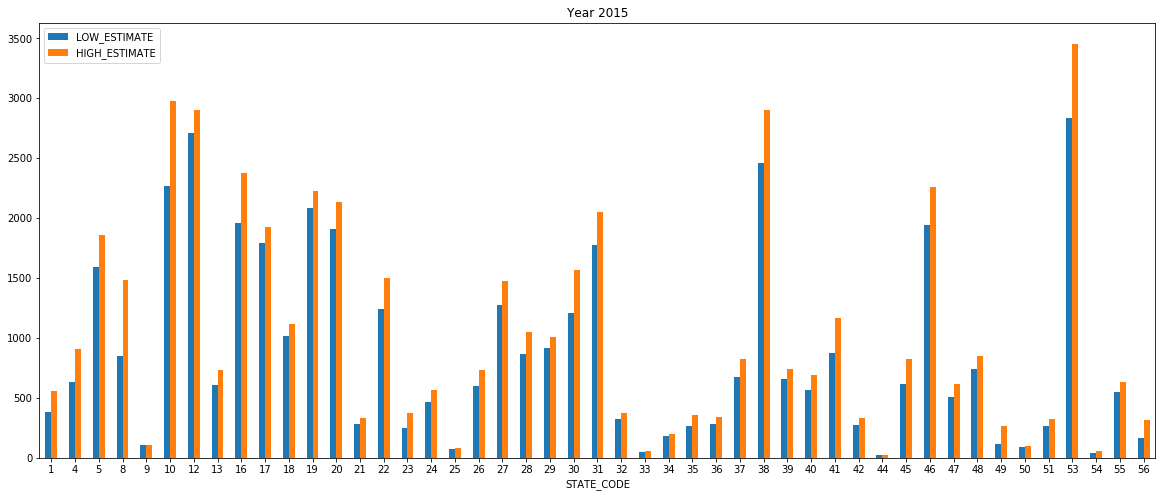

In [9]:
# mean value of pesticide-use of all states 
data2014_state_mean = get_data_state_mean_est(d2014)
data2014_state_mean.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Year 2014")

data2015_state_mean = get_data_state_mean_est(d2015)
data2015_state_mean.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Year 2015")

In [119]:
dx14 = data2014_state_mean.index
dx15 = data2015_state_mean.index
# check whether all states reported about pesticide-use in year 2014 and year 2015
dx14.equals(dx15)

False

### Question: which states are missing ? 

In [120]:
# What state was reported in 2014 but missing in 2015 and vice versa?
dxa14 = np.array(dx14)
dxa15 = np.array(dx15)
missing_states14_15 = np.setdiff1d(dxa14, dxa15), 
missing_states15_14 = np.setdiff1d(dxa15, dxa14)
missing_states14_15, missing_states15_14


((array([6]),), array([], dtype=int64))

### Answer: state_code '6' is missing in 2015

In [121]:
filter = states['STATE_CODE']
states[filter==missing_states14_15[0][0]]['STATE'].drop_duplicates().values[0]

'CA'

In [122]:
data_diff_state_mean = data2015_state_mean - data2014_state_mean
data_diff_state_mean

,LOW_ESTIMATE,HIGH_ESTIMATE
STATE_CODE,,
1,37.710514,36.321219
4,98.234205,91.015083
5,12.343171,-25.275733
6,NaN,NaN
8,-141.573703,22.309665
9,14.266237,7.323703
10,114.326815,297.114945
12,20.959911,30.334172
13,-56.229599,-82.372093


### Assume there is no changes in pesticide-use by setting the value of state CA is 0. So we will classify the difference in 3 groups of pesticide-use (more > 0, less < 0 and no changes = 0)

Text(0.5,1,'The Differences (changes) in all States between year 2014 and year 2015')

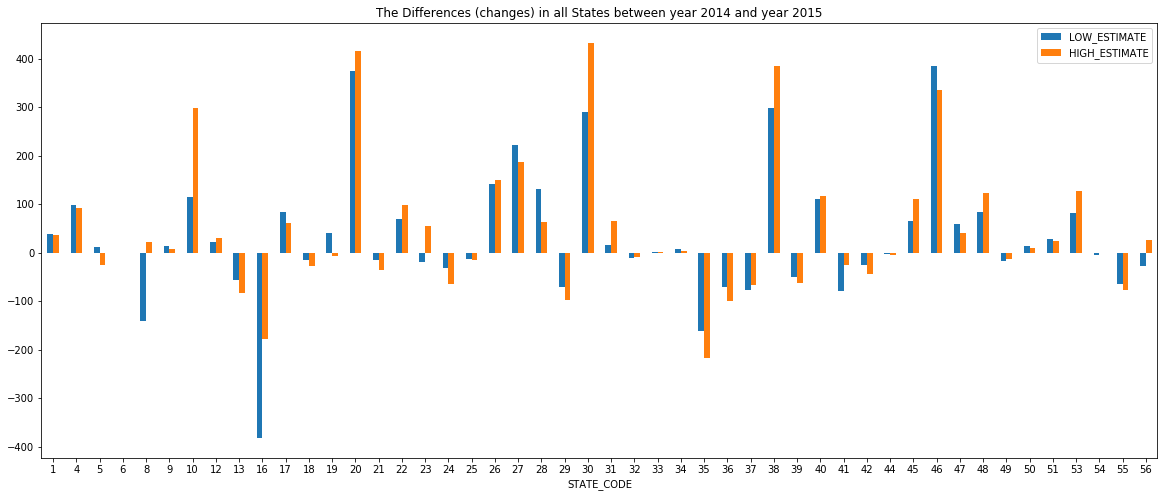

In [123]:
data_diff_state_mean[['LOW_ESTIMATE']] = data_diff_state_mean[['LOW_ESTIMATE']].replace(np.NaN, 0)
data_diff_state_mean[['HIGH_ESTIMATE']] = data_diff_state_mean[['HIGH_ESTIMATE']].replace(np.NaN, 0)
data_diff_state_mean.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("The Differences (changes) in all States between year 2014 and year 2015")

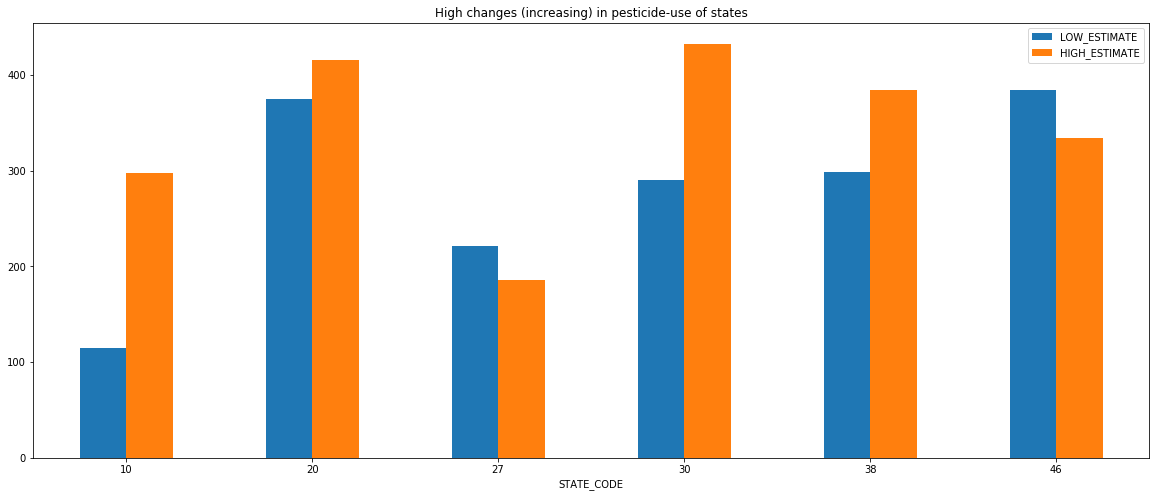

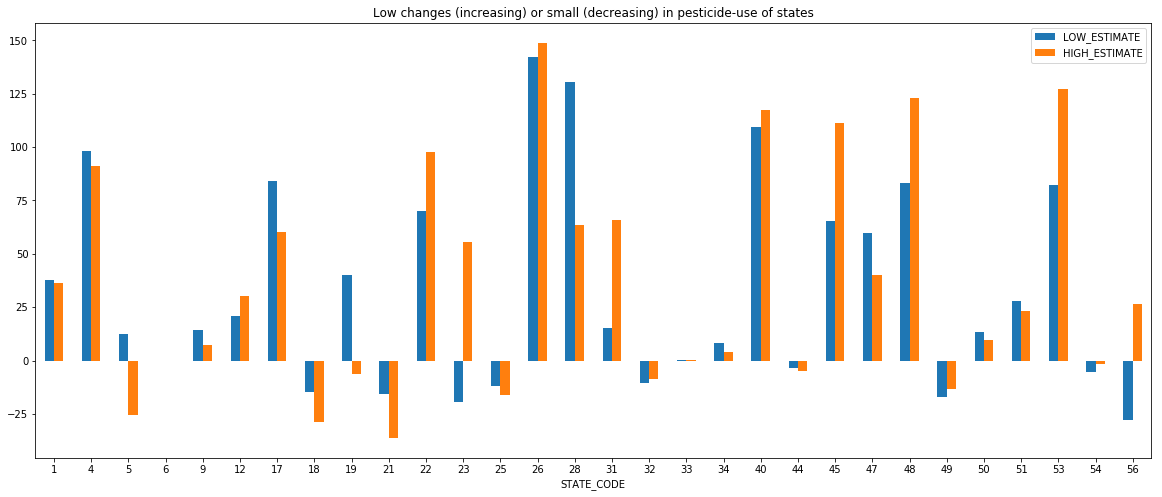

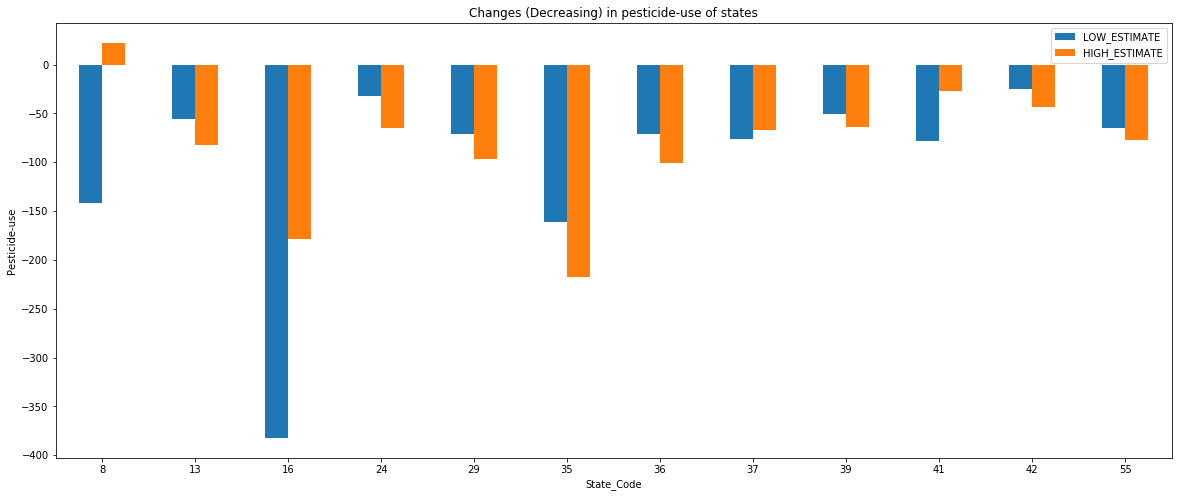

In [124]:
# Classify the differences in 3 groups (high) increases, (low) increases and decreases
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data_diff_state_mean)

data_diff_state_mean.index[y_kmeans == 0]
data_diff_state_mean[y_kmeans == 0].plot(kind='bar')
plt.title("High changes (increasing) in pesticide-use of states")
plt.xticks(rotation=0)

data_diff_state_mean.index[y_kmeans == 1]
data_diff_state_mean[y_kmeans == 1].plot(kind='bar')
plt.title("Low changes (increasing) or small (decreasing) in pesticide-use of states")
plt.xticks(rotation=0)

data_diff_state_mean.index[y_kmeans == 2]
data_diff_state_mean[y_kmeans == 2].plot(kind='bar')
plt.title("Changes (Decreasing) in pesticide-use of states")

plt.xticks(rotation=0)
plt.xlabel('State_Code')
plt.ylabel('Pesticide-use')
plt.legend()

### Data Source: https://www.kaggle.com/usgs/pesticide-use